# ***Atividade 15***


In [7]:
import scipy.io.wavfile as wavfile
import scipy.signal

fs, data = wavfile.read('teste.wav');
data = data[:, 0];  #para estereo pois o wavfile le apenas um canal
#normalizar o sinal
max_data = max(abs(data));
data = data/max_data;

#upsampling
fator_up = 10;
data_2 = scipy.signal.resample(data, fator_up*len(data));
fs2 = fator_up*fs;

C:\Users\Breno\AppData\Local\Temp\ipykernel_12724\2902405948.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read('teste.wav');


In [10]:
# modulação am
import numpy as np
t_max = len(data_2)/fs2; #  tempo máximo
t = np.linspace(0, t_max, (int) (t_max*fs2)); # pontos no tempo
m = 0.7 # indice de modulação
a_p = 1 # amplitude da portadora
f_p = 80000 # frequencia da portadora

portadora = np.cos(2 * np.pi * f_p * t);
am = (a_p + a_p * m * data_2) * portadora;

In [11]:
# demodulação
from scipy.signal import butter, filtfilt;
saida = am * portadora;
fc = fs/2;
b, a = butter(5, fc/(fs2*0.5), btype='low', analog=False);
demodulacao_sincrona = filtfilt(b,a, saida);
demodulacao_sincrona = demodulacao_sincrona-np.mean(demodulacao_sincrona)

In [12]:
# salvando arquivo de audio
demodulacao_sincrona = (demodulacao_sincrona*max_data).astype(np.int16);
wavfile.write('arquivo_saida_demodulacao.wav', fs2, demodulacao_sincrona);

### *Questão 1*: É possível reconhecer o sinal de aúdio após a demodulação?

Sim, mas aparentemente ele ficou com volume mais baixo.

In [13]:
mean = 0;

# ruido
potencia_ruido_1 = 0.01;

std_1 = np.sqrt(potencia_ruido_1);
ruido_1 = np.random.normal(mean, std_1, size=len(am));
# sinal + ruido
am_rx_1 = am + ruido_1;

# ruido
potencia_ruido_10 = 0.1;

std_10 = np.sqrt(potencia_ruido_10);
ruido_10 = np.random.normal(mean, std_10, size=len(am));
# sinal + ruido
am_rx_10 = am + ruido_10;


### *Questão 2*: Plote o sinal AM e o ruído para as duas configurações de ruído propostas (plote o sinal e o ruído em um único gráfico).

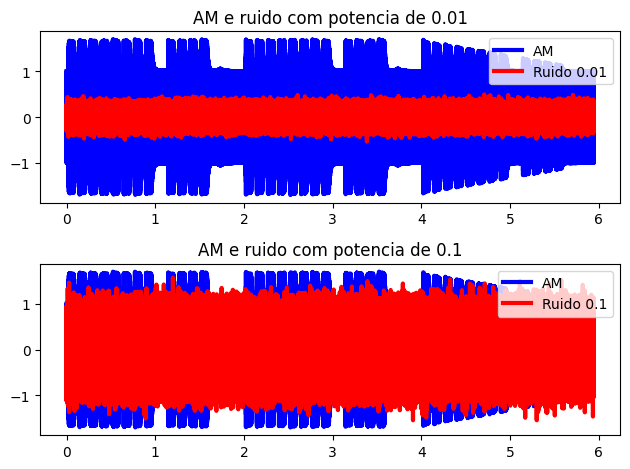

In [22]:
import matplotlib.pyplot as plt;

plt.subplot(2, 1, 1);
plt.plot(t, am, 'b', linewidth = 3, label="AM"); # plotando o grafico do am
plt.plot(t, ruido_1, 'r', linewidth = 3, label="Ruido 0.01"); # plotando o grafico do ruido
plt.legend(loc = 'upper right'); # definindo o lugar da legenda (canto superior direito) 
plt.title("AM e ruido com potencia de 0.01") # definindo um titlo para o gráfico

plt.subplot(2, 1, 2);
plt.plot(t, am, 'b', linewidth = 3, label="AM"); # plotando o grafico do am
plt.plot(t, ruido_10, 'r', linewidth = 3, label="Ruido 0.1"); # plotando o grafico do ruido
plt.legend(loc = 'upper right'); # definindo o lugar da legenda (canto superior direito) 
plt.title("AM e ruido com potencia de 0.1") # definindo um titlo para o gráfico

plt.tight_layout();

### *Questão 3*: Demodule este sinal com o ruído para as duas configurações e verifique se ainda é possível compreender o sinal de áudio.

In [24]:
# salvando arquivo de audio
saida_am_rx_1 = am_rx_1 * portadora;
fc = fs/2;
b_1, a_1 = butter(5, fc/(fs2*0.5), btype='low', analog=False);
demodulacao_sincrona_am_rx_1 = filtfilt(b_1,a_1, saida_am_rx_1);
demodulacao_sincrona_am_rx_1 = demodulacao_sincrona_am_rx_1-np.mean(demodulacao_sincrona_am_rx_1)
# salvando arquivo de audio
demodulacao_sincrona_am_rx_1 = (demodulacao_sincrona_am_rx_1*max_data).astype(np.int16);
wavfile.write('arquivo_saida_demodulacao_am_rx_1.wav', fs2, demodulacao_sincrona_am_rx_1);

In [25]:
saida_am_rx_10 = am_rx_10 * portadora;
fc = fs/2;
b_1, a_1 = butter(5, fc/(fs2*0.5), btype='low', analog=False);
demodulacao_sincrona_am_rx_10 = filtfilt(b_1,a_1, saida_am_rx_10);
demodulacao_sincrona_am_rx_10 = demodulacao_sincrona_am_rx_10-np.mean(demodulacao_sincrona_am_rx_10)
# salvando arquivo de audio
demodulacao_sincrona_am_rx_10 = (demodulacao_sincrona_am_rx_10*max_data).astype(np.int16);
wavfile.write('arquivo_saida_demodulacao_am_rx_10.wav', fs2, demodulacao_sincrona_am_rx_10);